# PRIVATE INVESTMENT IN EDUCATION
# Model Becker-Tomes without credit constraints (1986)

The model proposed by Becker and Tomes in 1986 focuses exclusively on individuals' investment decisions regarding education, disregarding financial constraints. This model significantly contributes to the literature on intergenerational income persistence and inequality.

Moreover, it is pertinent for comprehending individuals' choices concerning education investment and human capital formation in the absence of financial constraints or credit accessibility.

The subsequent section provides a comprehensive overview of the model, encompassing the variables employed, the analytical model utilized to maximize our equation, the numerical solution approach, and the analysis illustrating potential impacts resulting from changes in specific variables. Finally, we present our conclusions.

In [103]:
# Importing commands and taking equations from the module name "modelproject"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
import sympy as sm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from types import SimpleNamespace
from ipywidgets import interact, FloatSlider
import math
from scipy import optimize

# Ensure modules are reloaded on each run
%load_ext autoreload
%autoreload 2

# Assuming the class BeckerTomesModelDebugged is defined in the module named "modelproject"
from modelproject import BeckerTomesModelDebugged

# Create an instance of the model
model = BeckerTomesModelDebugged()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# A. Model description

As previously mentioned, the Becker-Tomes model focuses on parental investment in education without the presence of credit constraints. This model operates on several key assumptions:

- Parents allocate resources to enhance their children's human capital through education.
- The structure of credit markets plays a significant role in facilitating or hindering investment decisions.
- Intergenerational income persistence occurs through the transmission of endowments, implying that children's incomes tend to converge towards the population mean, irrespective of parental income levels.
- This heritability effect leads to a "regression to the mean" phenomenon in human capital and income, where variables initially extreme tend to move closer to the population average upon subsequent measurements.

The model presents a representative individual whose chooses how much time to invest in education in 2 periods in time ${t-1}$ (Child youth and parent adulthood) and time ${t}$ (Child adulthood, and grandchild). Human capital production depends on parental and public expenditures and endowment. 

The equation we have to maximize is: 

$$
Max_{x_{t-1}}Y_{t}-(1+r_{t})D_{t-1}
$$

$$
s.t
$$

$$
Y_{t}=H_{t}+I_{t}
$$

$$
H_{t}=\psi({x_{t-1}},{s_{t-1}},{E_{t}})
$$

$$
E_{t}= \alpha_{t} + h{E_{t-1}} + v_{t}
$$

$$
D_{t-1}= C_{t-1}+ x_{t-1}-Y_{t-1}
$$

Where $Y_{t}$ is the maximization of the children's income, $H_{t}$ is the Human Capital, Luckiness is represented by $I_{t}$, $x_{t-1}$ is the parents investment in education, $s_{t-1}$ is the government investment in education, $E_{t}$ is the children's endowments, $h$ is the intergenerational feature that measures the degree of “inheritability” of endowments, the rate from the financial market is represented by $r_{t}$, $C_{t-1}$ is the Consumption, and $(1+r_{t})D_{t-1}$ is when children pay for the debt with an interest rate.

Notice that:

$\psi'(.)>0$ in all inputs ($H_{t}$ is a growing functions) and $\psi''(.)<0$ shows a decreasing returns.

## B. Analytical solution

Considering that all the restrictions are included, we present the following maximization problem. It is important to mention that, the restrictions are included in the main equation. However, we will derivate in terms of $x_{t-1}$ to find how much income the children will receive if the parents invest more (return of education).

$$
Max_{x_{t-1}}\psi({x_{t-1}},{s_{t-1}},\alpha_{t} + h{E_{t-1}} + v_{t})+ I_{t}-(1+r_{t})C_{t-1}+ x_{t-1}-Y_{t-1}
$$

In [104]:
#Defining all variables

x1 = sm.symbols('x_{t-1}')
s1 = sm.symbols('s_{t-1}')
alpha = sm.symbols('alpha_t')
h = sm.symbols('h')
E1 = sm.symbols('alpha_t+h{E_{t-1}}+v_t')
v = sm.symbols('v_t')
I = sm.symbols('I_t')
r = sm.symbols('r_t')
C1 = sm.symbols('C_{t-1}')
Y1 = sm.symbols('Y_{t-1}')

#Defining psi as a function
psi = sm.Function('psi')(x1, s1, E1)
psi2 = sm.symbols('psi_{x_{t-1}}')

print('x1 is of type: ', type(x1))

x1 is of type:  <class 'sympy.core.symbol.Symbol'>


In [105]:
# Main equation 
objective = psi+I-((1+r)*(C1+x1-Y1))
objective

I_t - (r_t + 1)*(C_{t-1} - Y_{t-1} + x_{t-1}) + psi(x_{t-1}, s_{t-1}, alpha_t+h{E_{t-1}}+v_t)

In [106]:
#Taking the derivative in terms of x1
foc = sm.diff(objective, x1)
foc

-r_t + Derivative(psi(x_{t-1}, s_{t-1}, alpha_t+h{E_{t-1}}+v_t), x_{t-1}) - 1

Considering the previous equation, and when we optimize our problem, we found that the First Order Condition (FOC) is:

$$
{\psi_{x_{t-1}}}-(1+r_{t})=0
$$

$$
{\psi_{x_{t-1}}}=(1+r_{t})
$$

Where $\psi_{x_{t-1}}$ measure the return of education. In other words, how much income the children will recieve if the parents invest more in income and time in their children.
Given that this is a rate of return, we can write it as $r_m$.

In [107]:
r2 = sm.symbols('r_m')
Eq1 = sm.Eq(1 + r2, 1 + r)
Eq1
Eq2 = sm.Eq(psi2, Eq1)
Eq2

Eq(psi_{x_{t-1}}, Eq(r_m + 1, r_t + 1))

Considering that, $r_m$ and $r_t$ would be the same in the optimality.

## C. Numerical solution

In this section, we include numerical analysis to reach the optimal parental investment when parents invest in a certain capital level. We solve the model both continuously and discretely, enabling comparison of the results. If the solution found is similar with both methods, this would increase confidence in the robustness of the solution.

***Countinuous solution***

When solving the model continuously we use the SLSQP method, which minimizes a function with several variables with combinations of bounds. Thus, what is needed for this method is the bounds set and an initial guess for the variables.

In [108]:
# Solve the model using continuous optimization
model.solve_continuous()
# Print the results from the continuous solution
print(f'Optimal parental investment: {model.sol.optimal_X}')
print(f'Human capital level: {model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0)}')
print(f'Optimal income: {model.calc_income(model.human_capital_production(model.sol.optimal_X, model.par.S0, model.par.E0), model.par.I1)}')

Optimal parental investment: 0.2003270380467629
Human capital level: 1.6456489822863487
Optimal income: 2.1456489822863487


***Discrete solution***

Discrete optimization is performed using a grid search method. To do this, a range of X0 values is defined from 0 to 10 with 100 points for a thorough search. This method ensures that all possible values within the range are evaluated.

In [109]:
# Solve the model using discrete optimization
model.solve_discrete()

# Access and print the optimal values from the discrete solution
print(f'Optimal X0: {model.sol.optimal_X0}')
print(f'Optimal E1: {model.endowment_production(model.par.E0)}')
print(f'Optimal H1: {model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0))}')
print(f'Optimal Y1: {model.calc_income(model.human_capital_production(model.sol.optimal_X0, model.par.S0, model.endowment_production(model.par.E0)), model.par.I1)}')
print(f'Optimal D1: {model.calc_debt(model.sol.optimal_X0, model.par.Y0)}')

Optimal X0: 0.20202020202020202
Optimal E1: 1.42
Optimal H1: 1.95342161035749
Optimal Y1: 2.45342161035749
Optimal D1: 0.20202020202020243


**Interpretation**

The parental investment in education will be optimized when $Y_1$ is 2.45.  Meaning that with:

* $I1$: Luckiness = 0.5
* $H1$: Placeholder for human capital = 0
* $\alpha$:  Social endowment= 0.5
* $vt$ Luck, unsystematic component= 0.6
* $h$ Degree of inheritability of endowments $(0<h<1)$ = 0.8
* $X0$ Initial guess for parental investment = 0.5
* $S0$ Government investment in education = 1.0
* $E0$ Initial endowment = 0.4
* $rt$ Financial market rate (borrowing rate) = 0.05
* $Y0$ Parents' income in the first period. Our model is not taking in account credit constraints, hence income and consumption are set equal = 5
* $C0$ Parents' consumption in the first period =5

With those parameters the investment in eduction ($X_0$) will be 0.20.

## D. Comparative Statics: Analysis of Optimal Income and Optimal Investment in education in response to parameter changes

This section will analyze the change in Optimal Income $Y_1$ and in Optimal Investment in education $X_0$  in response to change in the following parameters: $X_0$ , $I_1$ , $r$ , $E_0$ , $h$ . We are using the continous approach to evaluate the impacts.

### The impact of Parental Education Investment on Income

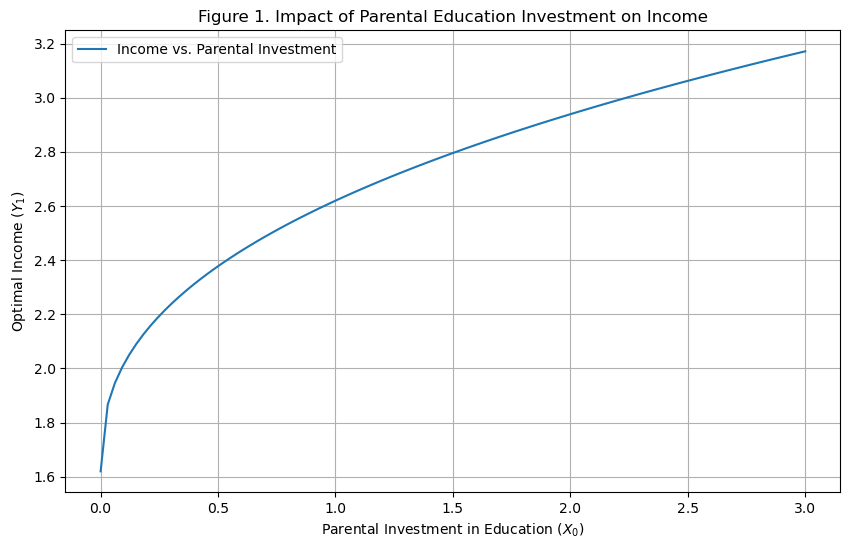

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [110]:
# Set a range of values for parental investment (X0)
X0_values = np.linspace(0, 3, 100)  # Adjust the range and count as needed
income_results = []

# Iterate over the range of X0 values, solve the model, and collect incomes
for X0 in X0_values:
    model.par.X0 = X0  # Update the parental investment parameter
    model.solve_continuous()  # Solve the model (assuming this updates the model.sol with new values)
    optimal_H = model.human_capital_production(X0, model.par.S0, model.par.E0)
    optimal_income = model.calc_income(optimal_H, model.par.I1)
    income_results.append(optimal_income)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(X0_values, income_results, label='Income vs. Parental Investment')
plt.xlabel('Parental Investment in Education $(X_0)$')
plt.ylabel('Optimal Income $(Y_1)$')
plt.title('Figure 1. Impact of Parental Education Investment on Income')
plt.grid(True)
plt.legend()
plt.show()

np.seterr(all='ignore')
np.seterr(all='warn')


**Interpretation of Figure 1**

Increasing the Parental Investment in Education at time 0 enhances the Optimal Income of the children in the subsequent period. Notably, the graph reveals diminishing returns from education investment. This implies that when parents have already allocated a significant sum to education, further increments in investment yield only marginal increases in children's income. Conversely, when parental investment is minimal, even slight enhancements result in substantial rises in children's income.

### The impact of Parental Education Investment on Income with varying Luckiness

In [120]:
def interactive_plot(Y0):
    model.par.Y0 = Y0
    X0_values = np.linspace(0, 1, 100)  # Parental investment range
    Y1_values = []

    for X0 in X0_values:
        E1 = model.endowment_production(model.par.E0)
        H1 = model.human_capital_production(X0, model.par.S0, E1)
        Y1 = model.calc_income(H1, Y0)
        Y1_values.append(Y1)

    plt.figure(figsize=(10, 6))
    plt.plot(X0_values, Y1_values, label=f'Luckiness $(I_1)$ = {Y0:.2f}')
    plt.xlabel('Parental Investment in Education $(X_0)$')
    plt.ylabel('Optimal Income $(Y_1)$')
    plt.title('Figure 2. Impact of Parental Investment on Optimal Income with Varying Luckiness')
    plt.ylim(2.5, 6)  # Set a fixed y-axis range, adjust as needed
    plt.legend()
    plt.grid(True)
    plt.show()

Y0_slider = FloatSlider(min=0, max=1, step=0.05, value=0.5, description='Luckiness $(I_1)$')
interact(interactive_plot, Y0=Y0_slider)

#There is an initial bug with this function that displays it in the wrong position, nevertheless once moving the
#interaction slider this bug will disappear on its own giving the true position of the function.

interactive(children=(FloatSlider(value=0.5, description='Luckiness $(I_1)$', max=1.0, step=0.05), Output()), …

<function __main__.interactive_plot(Y0)>

**Interpretation of Figure 2**

The Figure 2 displays that varying the coefficient that measues Luckiness in the job market significantly impact the income level of the child. Luckiness could consist in how well the economy is going when the child graduates, giving higher opportunities to find a well-paid job. In this sense, everything else kept equal, for a specific level of parental investment in education $(X_0)$ a higher luckiness level shifts the function upwards, corresponding to a higher income of the child.

### The impact of Financial Interest Rate on Optimal Parental Investment in Education


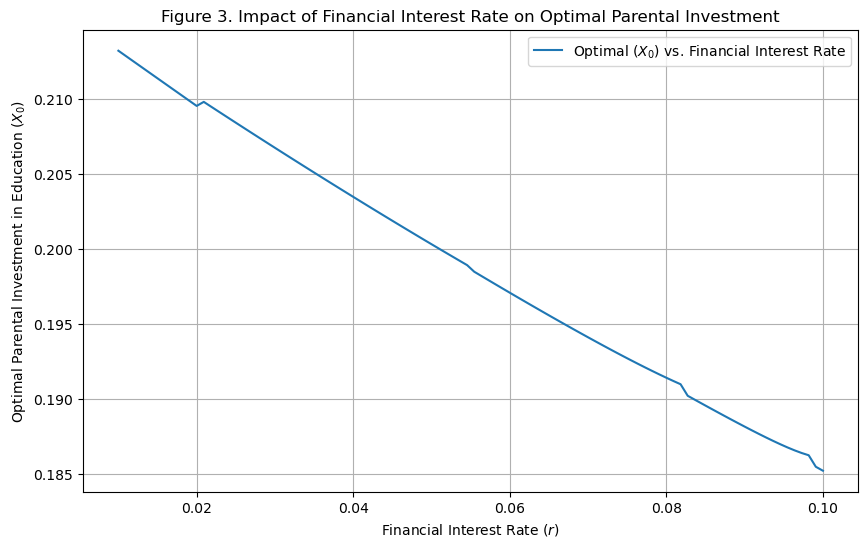

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

In [112]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Set a range of values for the rate of return (r)
r_values = np.linspace(0.01, 0.1, 100)  # Range of rates of return
X0_values_at_optimal = []  # List to hold X0 values at optimal points

for r in r_values:
    model.par.rt = r  # Update the rate of return in the model
    model.solve_continuous()  # Solve the model
    X0_values_at_optimal.append(model.sol.optimal_X)  # Collect the optimal X0 for each rate

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r_values, X0_values_at_optimal, label='Optimal $(X_0)$ vs. Financial Interest Rate')
plt.xlabel('Financial Interest Rate $(r)$')
plt.ylabel('Optimal Parental Investment in Education $(X_0)$')
plt.title('Figure 3. Impact of Financial Interest Rate on Optimal Parental Investment')
plt.grid(True)
plt.legend()
plt.show()

np.seterr(all='ignore')
np.seterr(all='warn')

**Interpretation of Figure 3**

The Figure 3 displays that when the Financial Interest Rate $(r)$  increases, parents will decrease their Optimal Investment in Education. This could be explained by the fact that an increase in the interest rate makes the debt that the children have to repay in the future more expensive. In this way, the future income of the children will not be able to repay the larger debt, hence leading to a reduction in parental investment.

### The impact of Initial Endowment on Optimal Income with varying Inheritability

**Interpretation of Figure 4**
    
The Figure above displays the relationship between the Initial Endowment $E_0$  and Optimal Income $(Y_1)$  with a varying Inheritability level $(h:0<h<1)$. According to this model, in a world without credit constraints, income inequality and intergenerational correlation of human capital only stem from inheritability of endowments $(h)$ . This means that since everyone can borrow as much as they want, everything else kept equal, the only factor that enhance intergenerational inequality is the starting level of endowment that everyone have. This could be represented as the genes of an individual or as other features that parents give to their children. Richer parents will generally be able to transmit higher Endowment to their children, which will lead to higher human capital, hence also a higher investment in their education, ultimately impacting their income as adults. If we assume an unrealistic world in which parents cannot transmit any endowment to their children, hence having no inheritability of abilities $(h=0)$ , we can show in the graph how the initial endowment of every children $(E_0)$ does not influence their future income. The more this parameter is increased, the higher the inequality in income $Y_1$  is achieved across individuals with different endowments $E_0$ , increasing the intergenerational persistence of inequality.

# E. Further analysis

The next graphs will display 3-dimensional figures on the changes of the model's parameters. 

Figure 5 will show the impact of Initial Endowment $(E_0)$  and Inheritability $(h)$  on Optimal Income $(Y_1)$. 

Figure 6 considers the human capital production function by varying the way in which this function is calculated by changing the weights assigned to the parameters of public and private investment.

### The impact of Initial Endowment and Inheritability on Optimal Income

In [114]:

# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Initial Endowment (E0) and Inheritability (h)
E0_values = np.linspace(0, 10, 50)  # Range of initial endowments
h_values = np.linspace(0, 1, 50)    # Range of inheritability values

# Prepare storage for computed Optimal Income (Y1)
Y1_values = np.zeros((len(h_values), len(E0_values)))

# Compute Y1 over grid of E0 and h
for j, E0 in enumerate(E0_values):
    for i, h in enumerate(h_values):
        model.par.h = h
        model.par.E0 = E0
        model.solve_continuous()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(E0)
            H1 = model.human_capital_production(model.sol.optimal_X, model.par.S0, E1)
            Y1 = model.calc_income(H1, model.par.I1)
            Y1_values[i, j] = Y1
        else:
            Y1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
E0_mesh, h_mesh = np.meshgrid(E0_values, h_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=E0_mesh, y=h_mesh, z=Y1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Initial Endowment (E0): %{x}<br>Inheritability (h): %{y}<br>Optimal Income (Y1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Initial Endowment (E0)', showgrid=True),
        yaxis=dict(title='Inheritability (h)', showgrid=True),
        zaxis=dict(title='Optimal Income (Y1)', showgrid=True)
    ),
    title="Figure 5. Impact of Initial Endowment and Inheritability on Optimal Income",
    width=1000,
    height=800
)

fig.show()

**Interpretation of Figure 5**

In this Figure, the relationship between Initial Endowment $(E_0)$ , Optimal Income $(Y_1)$  and Inheritability $(h)$  is shown. This Figure is displaying the same variables shown before, where the inheritability level was varying, but here all the parameters are displayed in a 3D graph. The visualization of the changes in parameters can help understand the concept previously defined.

### Impact of Private and Public Investment on Human Capital

In [115]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Private Investment (X0) and Public Investment (S0)
X0_values = np.linspace(0, 10, 50)  # Range of private investment
S0_values = np.linspace(0, 10, 50)  # Range of public investment

# Prepare storage for computed Human Capital (H1)
H1_values = np.zeros((len(X0_values), len(S0_values)))

# Compute H1 over grid of X0 and S0
for i, X0 in enumerate(X0_values):
    for j, S0 in enumerate(S0_values):
        model.par.X0 = X0  # Set the model's private investment
        model.par.S0 = S0  # Set the model's public investment
        model.solve_continuous()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(model.par.E0)  # Calculate endowment at the next period
            H1 = model.human_capital_production(X0, S0, E1)  # Calculate human capital
            H1_values[i, j] = H1
        else:
            H1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
X0_mesh, S0_mesh = np.meshgrid(X0_values, S0_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=X0_mesh, y=S0_mesh, z=H1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Private Investment (X0): %{x}<br>Public Investment (S0): %{y}<br>Human Capital (H1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Private Investment (X0)', showgrid=True),
        yaxis=dict(title='Public Investment (S0)', showgrid=True),
        zaxis=dict(title='Human Capital (H1)', showgrid=True)
    ),
    title="Figure 6. Impact of Private and Public Investment on Human Capital",
    width=1000,
    height=800
)

fig.show()

**Figure 6: Slightly Privately Weighted Model**

This Figure represents a scenario where private investment $(X_0)$  is slightly more influential than public investment $(S_0)$  in developing human capital $(H_1)$ . The visualization shows that increases in private investment have a marginally more pronounced impact on human capital, reflecting a model where private contributions play a critical but not overwhelming role alongside public funding. This shows a mixed-market economic model where both sectors contribute significantly to education and human capital development.

In [116]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Private Investment (X0) and Public Investment (S0)
X0_values = np.linspace(0, 10, 50)  # Range of private investment
S0_values = np.linspace(0, 10, 50)  # Range of public investment

# Prepare storage for computed Human Capital (H1)
H1_values = np.zeros((len(X0_values), len(S0_values)))

# Compute H1 over grid of X0 and S0
for i, X0 in enumerate(X0_values):
    for j, S0 in enumerate(S0_values):
        model.par.X0 = X0  # Set the model's private investment
        model.par.S0 = S0  # Set the model's public investment
        model.solve_continuous1()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(model.par.E0)  # Calculate endowment at the next period
            H1 = model.human_capital_production1(X0, S0, E1)  # Calculate human capital
            H1_values[i, j] = H1
        else:
            H1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
X0_mesh, S0_mesh = np.meshgrid(X0_values, S0_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=X0_mesh, y=S0_mesh, z=H1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Private Investment (X0): %{x}<br>Public Investment (S0): %{y}<br>Human Capital (H1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Private Investment (X0)', showgrid=True),
        yaxis=dict(title='Public Investment (S0)', showgrid=True),
        zaxis=dict(title='Human Capital (H1)', showgrid=True)
    ),
    title="Figure 7. Impact of Private and Public Investment on Human Capital",
    width=1000,
    height=800
)
fig.show()

np.seterr(all='ignore')
np.seterr(all='warn')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

**Figure 7: American Example with Emphasis on Private Investment**

Figure 7 represents a scenario often seen in the American economic context, where private investment in education is weighted more heavily than public investment. Here, the surface plot shows a steep rise in human capital primarily driven by increases in private investment $(X_0)$ , with relatively minor contributions from public investment $(S_0)$ . This graph highlights the critical role of private funding in education within the American system, where higher private contributions are expected to yield greater increases in human capital.

In [117]:
# Initialize the model
model = BeckerTomesModelDebugged()

# Define ranges for Private Investment (X0) and Public Investment (S0)
X0_values = np.linspace(0, 10, 50)  # Range of private investment
S0_values = np.linspace(0, 10, 50)  # Range of public investment

# Prepare storage for computed Human Capital (H1)
H1_values = np.zeros((len(X0_values), len(S0_values)))

# Compute H1 over grid of X0 and S0
for i, X0 in enumerate(X0_values):
    for j, S0 in enumerate(S0_values):
        model.par.X0 = X0  # Set the model's private investment
        model.par.S0 = S0  # Set the model's public investment
        model.solve_continuous2()
        if hasattr(model.sol, 'optimal_X'):
            E1 = model.endowment_production(model.par.E0)  # Calculate endowment at the next period
            H1 = model.human_capital_production2(X0, S0, E1)  # Calculate human capital
            H1_values[i, j] = H1
        else:
            H1_values[i, j] = np.nan  # Use NaN for cases where solution is not found

# Generate meshgrid for plotting
X0_mesh, S0_mesh = np.meshgrid(X0_values, S0_values)

# Create the 3D plot
fig = go.Figure(data=[go.Surface(
    x=X0_mesh, y=S0_mesh, z=H1_values,
    contours={
        'z': {
            'show': True,
            'usecolormap': True,
            'highlightcolor': "limegreen",
            'project_z': True
        }
    }
)])

# Update traces for aesthetics and hover information
fig.update_traces(
    colorscale="Viridis",
    hovertemplate="Private Investment (X0): %{x}<br>Public Investment (S0): %{y}<br>Human Capital (H1): %{z}<extra></extra>"
)

# Configure the layout of the plot
fig.update_layout(
    scene=dict(
        xaxis=dict(title='Private Investment (X0)', showgrid=True),
        yaxis=dict(title='Public Investment (S0)', showgrid=True),
        zaxis=dict(title='Human Capital (H1)', showgrid=True)
    ),
    title="Figure 8. Impact of Private and Public Investment on Human Capital",
    width=1000,
    height=800
)

fig.show()

np.seterr(all='ignore')
np.seterr(all='warn')

{'divide': 'ignore', 'over': 'ignore', 'under': 'ignore', 'invalid': 'ignore'}

**Figure 8: Scandinavian Example with Emphasis on Public Investment**

Figure 8 showcases a model typical of Scandinavian countries, where public investment in education is significantly more influential than private investment. The graph illustrates that human capital $(H_1)$ primarily increases through substantial public investment $(S_0)$, with private investment $(X_0)$  playing a less dominant role. This reflects the educational and economic policies prevalent in Scandinavian countries, where education is largely funded by the state and is seen as a collective good with substantial public investment.

Those three previous figures visually encapsulate the impact of differing educational investment strategies on the development of human capital, offering insights into how different economic models and societal values can shape educational outcomes. These visualizations serve as a powerful tool for comparing and contrasting the effectiveness and implications of private versus public investment in education across different cultural and economic frameworks.

# F. Conclusion

The Becker-Tomes model without credit constraints, developed in 1986, offers a framework for analyzing individuals' decisions regarding education and human capital investment. Key points of the model include:

a. **Variable Changes and Impacts**: As we can see in the previous figures, alterations in key variables such as parental investment in education, credit market structure, and intergenerational income persistence can have significant implications for human capital formation and income distribution. For instance, increased parental investment in education may lead to higher levels of human capital accumulation among individuals, thereby enhancing their earning potential and contributing to reduced income inequality.

b. **Policy Implications**: Policy interventions aimed at promoting human capital development and mitigating income inequality should consider the following strategies:
 - Targeted Education Investments: Implement targeted education programs that provide resources and support to individuals from disadvantaged backgrounds, ensuring equitable access to quality education and training opportunities.
 - Reform of Credit Markets: Address structural barriers in credit markets to facilitate access to financial resources for education investment, particularly for marginalized groups with limited access to credit.
 - Reducing Intergenerational Income Persistence: Implement policies that aim to break the cycle of intergenerational income persistence by providing support for early childhood development, enhancing access to educational resources, and promoting social mobility.
 - Long-Term Benefits: By investing in education and human capital development, policymakers can unlock long-term benefits for individuals, communities, and the economy as a whole. Enhanced human capital contributes to increased productivity, innovation, and economic growth, while also fostering greater social cohesion and inclusivity.

In summary, the Becker-Tomes model offers valuable insights into the complex relationship between education investment, human capital formation, and income distribution. By understanding the dynamics of these processes and implementing targeted policy interventions, we can work towards building a more equitable and prosperous society for all.